In [1]:
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

import numpy as np

import pylab as plt

import seaborn as sns

%matplotlib inline

import h2o

from h2o.automl import H2OAutoML

In [2]:
train=pd.read_csv(r"C:\Users\delbr\Desktop\Proyectos IronHack\Proyecto-Solar\data\solar_train.csv")

train.shape

(24514, 11)

In [3]:
train.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475175023,9/29/2016 12:00:00 AM,08:50:23,634.99,61,30.46,41,14.96,6.75,06:13:00,18:13:00
1,1481799902,12/15/2016 12:00:00 AM,01:05:02,1.27,37,30.26,70,207.43,5.62,06:50:00,17:46:00
2,1478339417,11/4/2016 12:00:00 AM,23:50:17,1.21,47,30.49,33,168.20,5.62,06:25:00,17:47:00
3,1472887208,9/2/2016 12:00:00 AM,21:20:08,1.67,54,30.46,101,152.60,3.37,06:07:00,18:37:00
4,1478724901,11/9/2016 12:00:00 AM,10:55:01,839.78,62,30.47,36,291.95,7.87,06:28:00,17:45:00


In [4]:
test=pd.read_csv(r"C:\Users\delbr\Desktop\Proyectos IronHack\Proyecto-Solar\data\solar_test.csv")

test.shape

(8172, 11)

In [5]:
test.head()

,id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,1,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,2,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00
3,3,1481475056,12/11/2016 12:00:00 AM,06:50:56,45,30.40,98,176.63,4.50,06:47:00,17:44:00
4,4,1477493117,10/26/2016 12:00:00 AM,04:45:17,45,30.40,34,175.89,6.75,06:21:00,17:52:00


# Cleaning dataframe

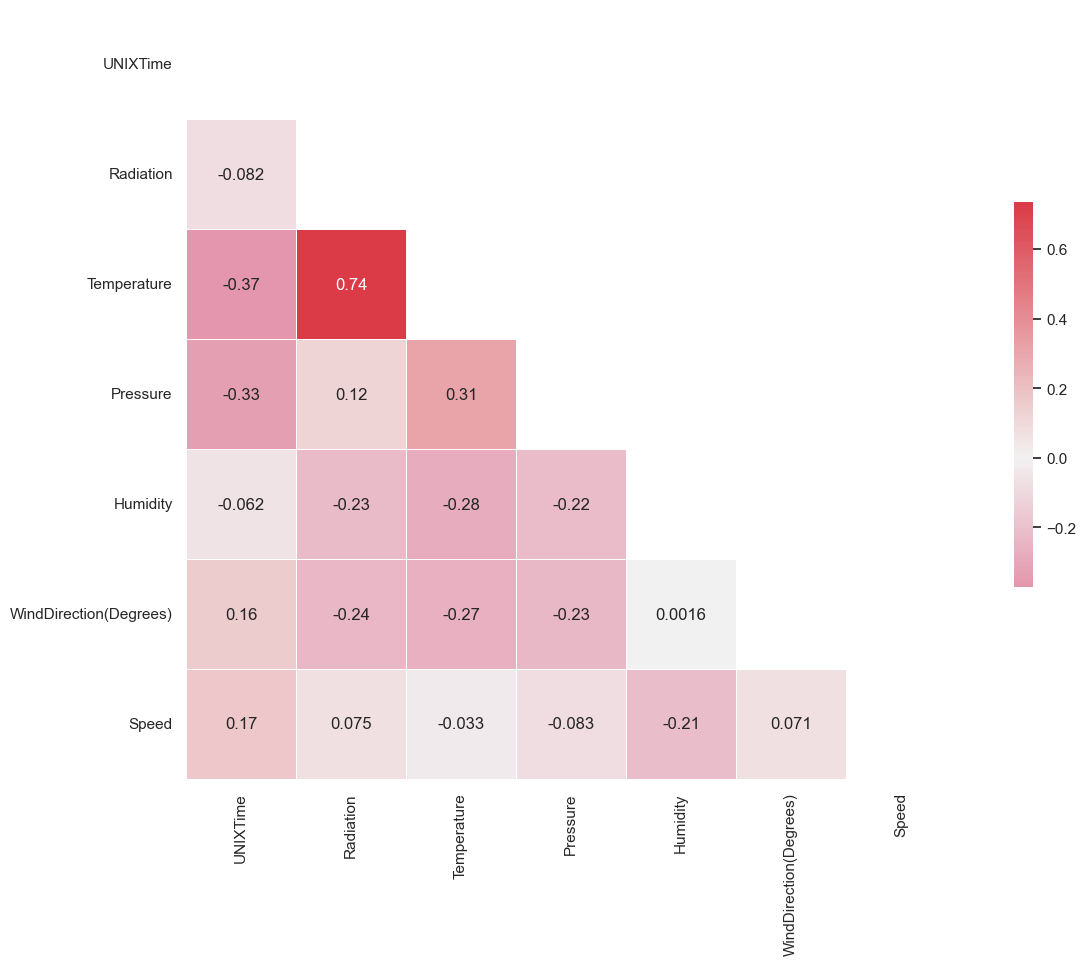

In [6]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(train.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [7]:
dropping = ['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet','WindDirection(Degrees)']

train = train.drop(dropping, axis=1)

dropping2 = ['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet','WindDirection(Degrees)']

test = test.drop(dropping2, axis=1)

In [8]:
train.shape, test.shape

((24514, 5), (8172, 5))

# H2O: predict best model

In [9]:
# inicializamos el modelo h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,29 mins 24 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_delbr_s1y0qg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.536 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [10]:
# parsear datos para h20

h2train=h2o.H2OFrame(train)

h2test=h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
h2train.columns

['Radiation', 'Temperature', 'Pressure', 'Humidity', 'Speed']

In [12]:
X=[c for c in h2train.columns if c!='Radiation']

y='Radiation'

In [13]:
# inicia auto-machine-learning

automl=H2OAutoML(max_models=10,
                 
                 seed=42,   # random_state
                 
                 max_runtime_secs=300,
                 
                 sort_metric='RMSE')

In [14]:
# entrena

automl.train(x=X,
             
             y=y,
             
             training_frame=h2train)

AutoML progress: |█
12:36:54.306: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [15]:
print('[INFO] Leader board:')

leader_board=automl.leaderboard

leader_board.head()

[INFO] Leader board:


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_4_20230825_123654,169.673,28789,102.698,nan,28789
StackedEnsemble_AllModels_1_AutoML_4_20230825_123654,169.708,28801,102.597,nan,28801
GBM_4_AutoML_4_20230825_123654,170.967,29229.6,104.802,nan,29229.6
GBM_3_AutoML_4_20230825_123654,172.273,29677.9,106.482,nan,29677.9
DRF_1_AutoML_4_20230825_123654,172.368,29710.6,107.574,2.13855,29710.6
GBM_2_AutoML_4_20230825_123654,173.477,30094.2,108.27,nan,30094.2
XRT_1_AutoML_4_20230825_123654,173.617,30143,112.212,2.24546,30143
GBM_1_AutoML_4_20230825_123654,174.292,30377.8,109.452,nan,30377.8
GBM_5_AutoML_4_20230825_123654,175.329,30740.2,109.701,nan,30740.2
GBM_grid_1_AutoML_4_20230825_123654_model_1,175.648,30852.2,108.879,nan,30852.2


In [16]:
# prediciones del lider

y_pred=automl.leader.predict(h2test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [17]:
y_pred[:10]

predict
651.425
636.081
-4.5032
11.7195
-9.37383
538.855
110.035
-0.275313
670.292
148.48


In [18]:
predictions = y_pred.as_data_frame()

predictions.head()

,predict
0,651.425244
1,636.080848
2,-4.503201
3,11.719546
4,-9.373829


In [19]:
submiss = pd.read_csv(r"C:\Users\delbr\Desktop\Proyectos IronHack\Proyecto-Solar\data\submission.csv")

submiss.head()

,id,Radiation
0,0,676.492755
1,1,963.890583
2,2,-0.876080
3,3,4.857794
4,4,-1.431263


In [20]:
submiss['Radiation'] = predictions['predict']

submiss.head()

,id,Radiation
0,0,651.425244
1,1,636.080848
2,2,-4.503201
3,3,11.719546
4,4,-9.373829


In [24]:
submiss.to_csv('submission.csv', index = False)